PACKAGES

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

IMPORTING THE JANUARY TO JUNE DATASET AND ALSO THE COMPLETE YEAR DATASET

In [2]:
dataset = pd.read_csv('accidentmonth.csv', parse_dates=['Date'], index_col=['Date'])

In [3]:
accident = pd.read_csv('Accident.csv', parse_dates=['Date'], index_col=['Date'])

In [4]:
dataset.head()

,Accidents
Date,
2019-01-01,148
2019-01-02,98
2019-01-03,120
2019-01-04,118
2019-01-05,104


RESAMPLING THE DATA TO DAIALY AND WEEKLY

In [5]:
weeks=dataset['Accidents'].resample('W').sum()
days=dataset['Accidents'].resample('D').sum()
weeks
days

Date
2019-01-01    148
2019-01-02     98
2019-01-03    120
2019-01-04    118
2019-01-05    104
             ... 
2019-06-26    182
2019-06-27    239
2019-06-28    241
2019-06-29    198
2019-06-30    167
Freq: D, Name: Accidents, Length: 181, dtype: int64

<AxesSubplot:xlabel='Date'>

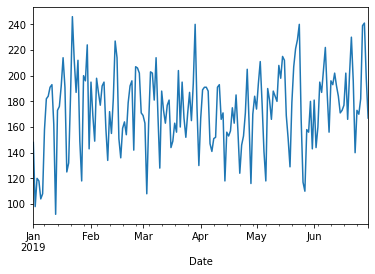

In [6]:
days.plot()

Date
2019-01-06     696
2019-01-13    1162
2019-01-20    1203
2019-01-27    1308
2019-02-03    1276
2019-02-10    1242
2019-02-17    1237
2019-02-24    1186
2019-03-03    1226
2019-03-10    1260
2019-03-17    1175
2019-03-24    1197
2019-03-31    1262
2019-04-07    1214
2019-04-14    1142
2019-04-21    1146
2019-04-28    1078
2019-05-05    1252
2019-05-12    1207
2019-05-19    1282
2019-05-26    1358
2019-06-02    1072
2019-06-09    1311
2019-06-16    1311
2019-06-23    1312
2019-06-30    1370
Freq: W-SUN, Name: Accidents, dtype: int64

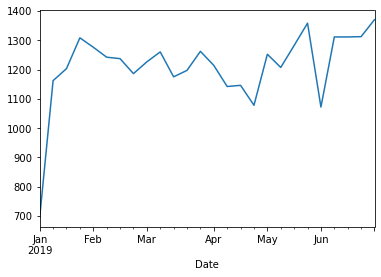

In [7]:
weeks.plot()
len(weeks)
weeks

<AxesSubplot:xlabel='Date'>

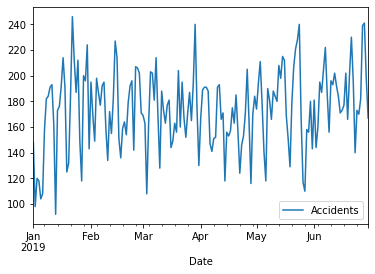

In [8]:
dataset.plot()

STATIONARITY TEST FOR THE RESAMPLED DIALY, WEEKLY AND THE DATASET. HOWEVER, WEEKLY DATA CAN'T BE UTILIZED DUE TO INCOMPLETE OBSERVATIONS. THEREFORE THE DATASET TO BE UTILIZED IN THIS ANALYSIS IS THE MAIN JAN TO JUNE DATASET.

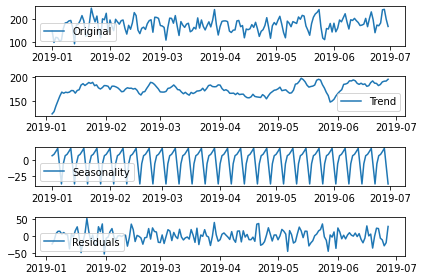

In [9]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(days)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset, label ='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [10]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(weeks)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset, label ='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


ValueError: x must have 2 complete cycles requires 104 observations. x only has 26 observation(s)

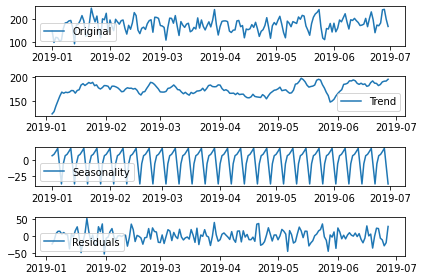

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset, label ='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
adftest=adfuller(dataset)
print('pvalue of adfuller test is: ', adftest[1])


pvalue of adfuller test is:  7.409122722215992e-05


LOG-TRANSFORMATION TO DIAGNOSIS THE NON-STATIONARITY OF THE DATA

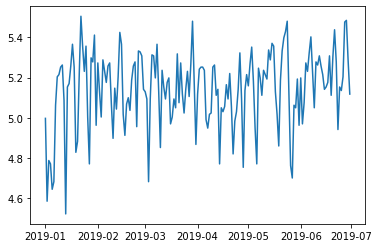

In [13]:
dataset_log= np.log(dataset)
plt.plot(dataset_log)

A PERFECT ADF RESULT FOR STATIONARITY

In [14]:
adftest=adfuller(dataset_log)
print('pvalue of adfuller test is: ', adftest[1])

pvalue of adfuller test is:  0.023704953463923255


In [15]:
len(dataset_log)

181

In [16]:
dataset_log

,Accidents
Date,
2019-01-01,4.997212
2019-01-02,4.584967
2019-01-03,4.787492
2019-01-04,4.770685
2019-01-05,4.644391
...,...
2019-06-26,5.204007
2019-06-27,5.476464
2019-06-28,5.484797


TRAIN AND TEST SPLIT

In [17]:
train=dataset_log[:90]
test=dataset_log[90:]

ACF AND PACF PLOT IN DETERMING P, D, Q VALUES HOWEVER THIS WON'T BE UTILIZED

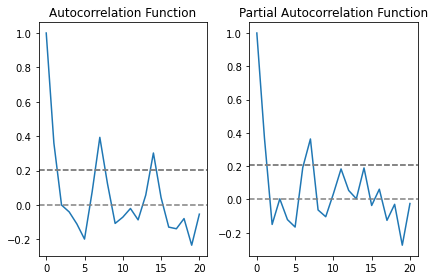

In [18]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train, nlags=20)
lag_pacf = pacf(train, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

ARIMA BUILDING MODEL

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
model=ARIMA(train,order =(0,0,6)).fit()

C:\Users\Cex\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
len(train),(len(dataset_log)-1)

(90, 180)

In [23]:
pred=model.predict(start=len(train),end=(len(dataset_log)-1))

In [24]:
pred.head()

2019-04-01    5.040786
2019-04-02    5.012449
2019-04-03    4.946661
2019-04-04    5.101546
2019-04-05    5.263968
Freq: D, dtype: float64

MODEL EVALUATION

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
error=np.sqrt(mean_squared_error(test,pred))
error

0.1753422192761225

In [27]:
test.mean(), np.sqrt(test.var())

(Accidents    5.159183
 dtype: float64,
 Accidents    0.169243
 dtype: float64)

<AxesSubplot:xlabel='Date'>

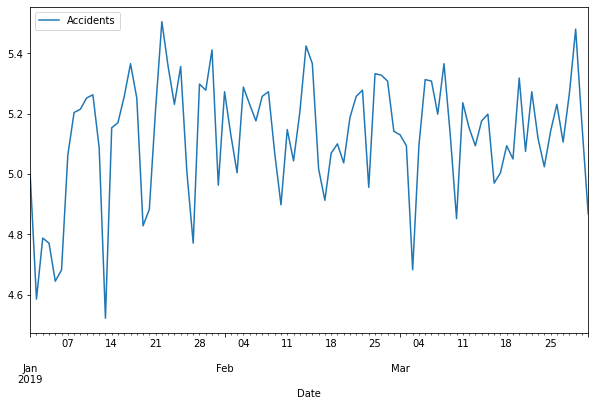

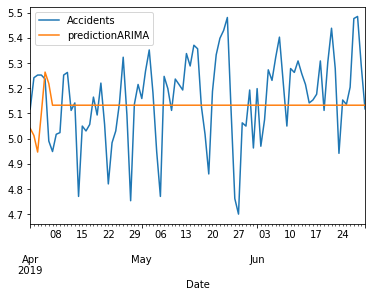

In [28]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='predictionARIMA')

PREDICT FUTURE DATA

In [43]:
final_model=ARIMA(dataset,order=(0,0,6)).fit()

In [44]:
prediction=final_model.predict(len(dataset_log),len(dataset_log)+20)

<AxesSubplot:xlabel='Date'>

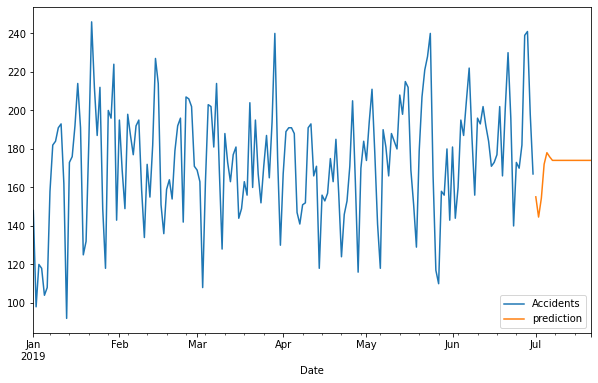

In [45]:
dataset.plot(legend=True, label='Train', figsize=(10,6))
prediction.plot(legend=True, label='prediction')

LOOP METHOD OF DETERMINING P,D,Q VALUES UTILIZED IN THIS ANALYSIS

In [27]:
import itertools

In [34]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [35]:
pdq_combination=list(itertools.product(p,d,q))

In [38]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [36]:
len(pdq_combination)

128

In [37]:
rmse=[]
order=[]

In [41]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(dataset_log)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order.append(pdq)
        rmse.append(error)
    except:
        continue

In [46]:
results=pd.DataFrame(index=order,data=rmse,columns=['RMSE'])

In [47]:
results.to_csv('ARIMA_result.csv')

In [51]:
ARIMA_results = pd.read_csv('ARIMA_result.csv')
ARIMA_results

,Unnamed: 0,RMSE
0,"(0, 0, 0)",0.168027
1,"(0, 0, 1)",0.167246
2,"(0, 0, 2)",0.166951
3,"(0, 0, 3)",0.166824
4,"(0, 0, 4)",0.166868
...,...,...
163,"(7, 1, 1)",5.155415
164,"(7, 1, 2)",5.155431
165,"(7, 1, 3)",5.158261
166,"(7, 1, 5)",5.159835


In [52]:
ARIMA_results.sort_values('RMSE')

,Unnamed: 0,RMSE
90,"(0, 0, 6)",0.162698
6,"(0, 0, 6)",0.162698
21,"(1, 0, 6)",0.162709
105,"(1, 0, 6)",0.162709
20,"(1, 0, 5)",0.163318
...,...,...
128,"(3, 1, 3)",5.158213
81,"(7, 1, 3)",5.158261
165,"(7, 1, 3)",5.158261
166,"(7, 1, 5)",5.159835


<AxesSubplot:xlabel='Date'>

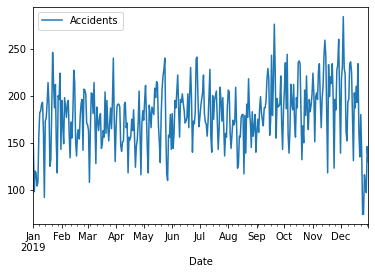

In [51]:
accident.plot()